In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
### explore modeled & observed streamflow data from Aubrey Dugger (NCAR)
df_nhm = pd.read_csv('input_data/modeled_gages/streamflow_daily_nhmv10.txt', sep = '\t', dtype = {'site_no': str})
df_nhm.index = pd.to_datetime(df_nhm['UTC_date'])
df_nhm.head()

,site_no,UTC_date,q_cms_obs,q_cms_mod,tag
UTC_date,,,,,
1983-10-01,01417000,1983-10-01,1.880239,2.970378,nhmv1
1983-10-02,01417000,1983-10-02,1.976516,3.046074,nhmv1
1983-10-03,01417000,1983-10-03,1.987843,3.102649,nhmv1
1983-10-04,01417000,1983-10-04,1.982179,3.100692,nhmv1
1983-10-05,01417000,1983-10-05,2.010496,3.012292,nhmv1


In [11]:
### explore modeled & observed streamflow data from Aubrey Dugger (NCAR)
df_nwm = pd.read_csv('input_data/modeled_gages/streamflow_daily_nwmv21.txt', sep = '\t', dtype = {'site_no': str})
df_nwm.index = pd.to_datetime(df_nwm['UTC_date'])
df_nwm.tail()

,site_no,UTC_date,q_cms_obs,q_cms_mod,tag
UTC_date,,,,,
2016-12-27,01481500,2016-12-27,6.399607,10.205416,NWMV21_FullRouting_Retro
2016-12-28,01481500,2016-12-28,6.144756,9.650833,NWMV21_FullRouting_Retro
2016-12-29,01481500,2016-12-29,6.512875,8.673750,NWMV21_FullRouting_Retro
2016-12-30,01481500,2016-12-30,7.334063,9.230000,NWMV21_FullRouting_Retro
2016-12-31,01481500,2016-12-31,6.173073,10.423333,NWMV21_FullRouting_Retro


In [12]:
### reshape dataframe to have gages as columns
ndays = len(set(df_nhm['UTC_date']))

sites = list(set(df_nhm['site_no']))

obs = df_nhm.iloc[:ndays, -1:]
nhm = df_nhm.iloc[:ndays, -1:]
nwm = df_nwm.iloc[:ndays, -1:]
for site in sites:
    obs[site] = df_nhm.loc[df_nhm['site_no'] == site, 'q_cms_obs']
    nhm[site] = df_nhm.loc[df_nhm['site_no'] == site, 'q_cms_mod']
    nwm[site] = df_nwm.loc[df_nwm['site_no'] == site, 'q_cms_mod']
obs.drop('tag', axis=1, inplace=True)
nhm.drop('tag', axis=1, inplace=True)
nwm.drop('tag', axis=1, inplace=True)

### convert cms -> mgd
obs *= 22.82
nhm *= 22.82
nwm *= 22.82

nwm.head()

,01436000,01434000,01429000,01454700,01473000,01479000,01433500,01417000,01437500,01438500,...,01428500,01446500,01478000,01474500,01469500,01459500,01480685,01463620,01463500,01431500
UTC_date,,,,,,,,,,,,,,,,,,,,,
1983-10-01,59.331999,475.207473,6.389600,343.621651,49.224641,40.163199,65.426840,75.153865,100.949973,591.684553,...,233.058753,749.846167,8.462416,458.824615,11.866400,43.586199,0.6846,1.540350,1366.233369,29.399766
1983-10-02,59.398557,471.812998,6.332550,340.864234,49.528907,40.058607,65.265199,74.431232,100.246356,589.811412,...,231.622995,743.199842,7.948966,457.826240,11.704758,43.310457,0.6846,1.835108,1344.649453,29.152549
1983-10-03,59.160849,468.760823,6.161400,338.705842,49.110541,39.934999,65.151099,73.718107,99.818481,585.732337,...,230.263303,737.124017,6.807967,448.546107,11.638200,43.044224,0.6846,3.812842,1321.277970,28.905333
1983-10-04,59.103799,465.870290,6.161400,336.690076,47.960032,39.754341,65.036999,73.023998,99.314539,582.575570,...,228.970170,731.618692,7.321417,441.928307,11.619183,42.787499,0.6846,1.930192,1303.554438,28.648608
1983-10-05,59.103799,463.207956,6.123367,334.693326,48.254791,39.630732,64.903882,72.339398,98.962731,579.152570,...,227.715070,727.130759,7.730275,437.801690,11.410000,42.521266,0.6846,1.654450,1290.432938,28.382374


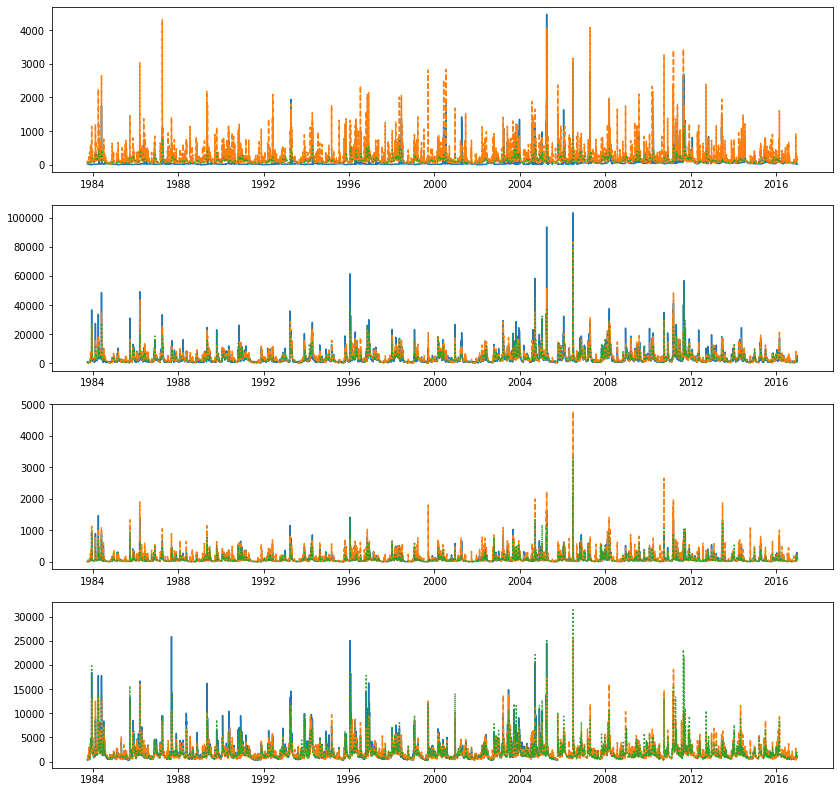

In [13]:
### compare estimates from models & observations
num_sites = 9
fig, axs = plt.subplots(4,1, figsize=(14,14))
axnum = 0
for i in range(4):
    ax = axs[i]
    ax.plot(obs[sites[axnum]])
    ax.plot(nhm[sites[axnum]], ls='--')
    ax.plot(nwm[sites[axnum]], ls=':')
    axnum += 1



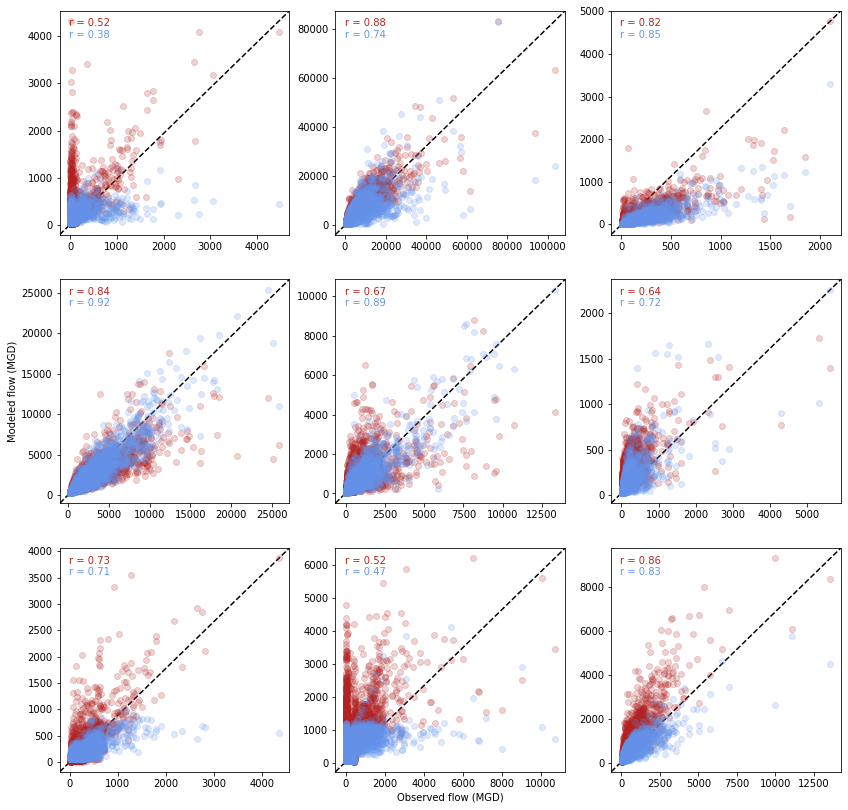

In [17]:
### compare estimates from models & observations
import numpy.ma as ma

def corrcoef_nan_masked(a, b):
    return round(ma.corrcoef(ma.masked_invalid(a), ma.masked_invalid(b))[0,1], 2)

num_sites = 9
fig, axs = plt.subplots(3,3, figsize=(14,14))
axnum = 0
for i in range(3):
    for j in range(3):
        ax = axs[i,j]
        ax.scatter(obs[sites[axnum]], nhm[sites[axnum]], color='firebrick', alpha=0.2, zorder=2)
        ax.scatter(obs[sites[axnum]], nwm[sites[axnum]], color='cornflowerblue', alpha=0.2, zorder=3)
        ax.plot([0, 1], [0, 1], transform=ax.transAxes, color='k', ls='--', zorder=1)
        ax.annotate(f'r = {corrcoef_nan_masked(obs[sites[axnum]], nhm[sites[axnum]])}',
                    xy = (0.04,0.93), xycoords=ax.transAxes, color = 'firebrick')
        ax.annotate(f'r = {corrcoef_nan_masked(obs[sites[axnum]], nwm[sites[axnum]])}',
                    xy = (0.04,0.88), xycoords=ax.transAxes, color = 'cornflowerblue')
        if i == 1 and j == 0:
            ax.set_ylabel('Modeled flow (MGD)')
        elif i == 2 and j == 1:
            ax.set_xlabel('Observed flow (MGD)')
        axnum += 1

### note: it's not necessarily bad that many of these aren't great fit, because nhm/nwm don't account for mgmt. 
###       e.g. see next cell, where observed flows below NYC reservoirs are much lower than modeled due to demand.

In [61]:
### link to reservoirs & set up for input to pywr
istarf = pd.read_csv('model_data/drb_model_istarf_conus.csv') 
meanflows = {istarf.iloc[i,:].loc['reservoir']: istarf.iloc[i,:].loc['GRanD_MEANFLOW_MGD'] for i in range(istarf.shape[0])}
site_matches_reservoir = {'cannonsville': '01425000',
                'pepacton': '01417000',
                'neversink': '01436000', 
                'wallenpaupack': '01429000',  ## Note, wanted to do 01431500 minus 01432110, but don't have latter from Aubrey, so use Prompton for now
                'prompton': '01429000',
                'shoholaMarsh': '01429000',  ## Note, should have 01432495, but not didnt get from Aubrey, so use Prompton for now
                'mongaupeCombined': '01433500',
                'beltzvilleCombined': '01449800',
                'fewalter': '01447800',
                'merrillCreek': '01459500',  ## Merrill Creek doesnt have gage - use Nockamixon nearby to get flow shape
                'hopatcong': '01455500',
                'nockamixon': '01459500', 
                'assunpink': '01463620',
                'vanSciver': '01463620',     ## Van Sciver doesnt have gage - use Assunpink nearby to get flow shape
                'ontelaunee': '01470960',  ## Note, should have 01470761, but didnt get from Aubrey, so use Blue Marsh
                'stillCreek': '01469500',
                'blueMarsh': '01470960',
                'greenLane': '01473000',
                'springton': '01480685',     ## Springton doesnt have gage - use Marsh Creek nearby to get flow shape
                'marshCreek': '01480685'
                }

for reservoir, site in site_matches_reservoir.items():
    obs_meanflow = obs[site].mean()
    nhm_meanflow = nhm[site].mean()
    nwm_meanflow = nwm[site].mean()
    
    print(reservoir, obs_meanflow, nhm_meanflow, nwm_meanflow, meanflows[reservoir])

cannonsville 404.90585639043815 533.047137198335 454.04460439999747 561.5959693
pepacton 168.99313830615844 485.3310161642009 360.72128475381595 474.7260543
neversink 55.16080670822157 174.18708578096357 129.8581659157104 117.9796613
wallenpaupack 72.76478940395208 79.40521843984632 60.73360964337621 245.9792628
prompton 72.76478940395208 79.40521843984632 60.73360964337621 8.559174497
shoholaMarsh 72.76478940395208 79.40521843984632 60.73360964337621 61.67170531
mongaupeCombined 219.36565344067898 252.7064195358714 198.1245344540568 243.1262046
beltzvilleCombined 111.34292203421172 84.57632340183616 91.55683715712387 116.5417199
fewalter 421.42250104175497 242.28693882312857 378.34385447422454 8.559174497
merrillCreek 110.69283508685047 100.42311782395608 95.33940409944445 3.355196403
hopatcong 32.65873459425588 24.764481741730023 15.28799681510095 31.15539517
nockamixon 110.69283508685047 100.42311782395608 95.33940409944445 83.49189416
assunpink 29.601378314881703 33.07518082967682 

In [52]:
def get_inflows_reservoir(dataset, label):
    for reservoir, site in site_matches_reservoir.items():
        if reservoir == 'cannonsville':
            inflow = pd.DataFrame(dataset.loc[:, site])
            inflow.columns = [reservoir]
        else:
            inflow[reservoir] = dataset[site]
        ## rescale based on grand meanflow
        inflow[reservoir] *= meanflows[reservoir] / inflow[reservoir].mean()
    
    inflow.to_csv(f'input_data/inflows_{label}.csv')
    return inflow
    
obs_inflow = get_inflows_reservoir(obs, 'obs_scaled')
nhm_inflow = get_inflows_reservoir(nhm, 'nhmv10_scaled')
nwm_inflow = get_inflows_reservoir(nwm, 'nwmv21_scaled')
nwm_inflow

,cannonsville,pepacton,neversink,wallenpaupack,prompton,shoholaMarsh,mongaupeCombined,beltzvilleCombined,fewalter,merrillCreek,hopatcong,nockamixon,assunpink,vanSciver,ontelaunee,stillCreek,blueMarsh,greenLane,springton,marshCreek
UTC_date,,,,,,,,,,,,,,,,,,,,
1983-10-01,71.974934,98.905996,53.904728,25.878736,0.900485,6.488294,80.287782,58.094667,1.328701,1.533891,26.972817,38.169887,1.903454,1.799046,1.658522,2.285802,38.778451,19.803627,0.922996,0.317836
1983-10-02,71.974934,97.954976,53.965198,25.647676,0.892445,6.430363,80.089425,58.094667,1.315364,1.524187,26.972817,37.928411,2.267696,2.143307,1.658522,2.254665,38.778451,19.926037,0.922996,0.317836
1983-10-03,71.974934,97.016471,53.749234,24.954496,0.868325,6.256569,79.949408,58.094667,1.301598,1.514818,26.972817,37.695262,4.711637,4.453193,1.658522,2.241844,38.778451,19.757723,0.922996,0.317836
1983-10-04,71.974934,96.102992,53.697402,24.954496,0.868325,6.256569,79.809392,58.094667,1.288476,1.505783,26.972817,37.470439,2.385193,2.254360,1.658522,2.238181,38.778451,19.294861,0.922996,0.317836
1983-10-05,71.974934,95.202026,53.697402,24.800456,0.862965,6.217948,79.646039,58.094667,1.275570,1.496414,26.972817,37.237290,2.044451,1.932308,1.658522,2.197886,38.778451,19.413445,0.922996,0.317836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,347.820043,116.449797,50.596153,307.155952,10.687898,77.009871,77.534124,55.189934,7.316781,1.040329,30.053764,25.887910,12.407703,11.727112,7.110365,2.236349,166.249822,77.210046,21.216100,7.305820
2016-12-28,357.404941,122.631422,50.587514,325.640764,11.331102,81.644367,78.129194,55.359377,7.134803,1.004190,29.491830,24.988620,8.624294,8.151231,7.053689,1.890182,164.924659,66.759301,17.536933,6.038889
2016-12-29,363.720388,127.361491,50.587514,280.198935,9.749893,70.251232,78.572580,55.480407,6.914320,1.078810,28.445471,26.845488,10.562997,9.983592,6.955749,1.941466,162.634685,70.297712,17.036977,5.866728


In [66]:
### match gages to get catchments for mainstem links, subtracting upstream reservoir/link
site_matches_link = [['delLordville', ['01427207'], ['cannonsville', 'pepacton']],
#                 ['delLackawaxen', ['01432110', '01428500'], ['prompton','wallenpaupack','delLordville']],
#                 ['delMontague', ['01438500'], ['delLackawaxen', 'shoholaMarsh', 'mongaupeCombined', 'neversink']],
                ['delMontague', ['01438500'], ['prompton','wallenpaupack','delLordville', 'shoholaMarsh', 'mongaupeCombined', 'neversink']],
                ['delLehigh', ['01454700', '01446500'], ['delMontague', 'beltzvilleCombined', 'fewalter']], # should include , '01446775' too, but not included by Aubrey. And really should just use 01457500, downstream of junction
                ['delTrenton', ['01463500'], ['delLehigh', 'merrillCreek', 'hopatcong', 'nockamixon']],
                ]

# for node, sites, upstream in site_matches:
#     obs_meanflow = obs[site].mean()
#     nhm_meanflow = nhm[site].mean()
#     nwm_meanflow = nwm[site].mean()
    
#     print(reservoir, obs_meanflow, nhm_meanflow, nwm_meanflow, meanflows[reservoir])

def get_inflows(dataset, label):
    for reservoir, site in site_matches_reservoir.items():
        if reservoir == 'cannonsville':
            inflow = pd.DataFrame(dataset.loc[:, site])
            inflow.columns = [reservoir]
        else:
            inflow[reservoir] = dataset[site]
    ## rescale based on grand meanflow
    inflow[reservoir] *= meanflows[reservoir] / inflow[reservoir].mean()
    
    for node, sites, upstreams in site_matches_link:
        inflow[node] = dataset.loc[:, sites].sum()
        inflow[node] -= inflow.loc[:, upstreams].sum()
        
    inflow.to_csv(f'input_data/inflows_{label}.csv')
    return inflow

obs_inflow = get_inflows(obs, 'obs_scaled')
nhm_inflow = get_inflows(nhm, 'nhmv10_scaled')
nwm_inflow = get_inflows(nwm, 'nwmv21_scaled')
nwm_inflow

,cannonsville,pepacton,neversink,wallenpaupack,prompton,shoholaMarsh,mongaupeCombined,beltzvilleCombined,fewalter,merrillCreek,...,ontelaunee,stillCreek,blueMarsh,greenLane,springton,marshCreek,delLordville,delMontague,delLehigh,delTrenton
UTC_date,,,,,,,,,,,,,,,,,,,,,
1983-10-01,58.190999,75.153865,59.331999,6.389600,6.389600,6.389600,65.426840,45.639999,58.732974,43.586199,...,31.719799,11.866400,31.719799,49.224641,0.684600,0.317836,NaN,NaN,NaN,NaN
1983-10-02,58.190999,74.431232,59.398557,6.332550,6.332550,6.332550,65.265199,45.639999,58.143457,43.310457,...,31.719799,11.704758,31.719799,49.528907,0.684600,0.317836,NaN,NaN,NaN,NaN
1983-10-03,58.190999,73.718107,59.160849,6.161400,6.161400,6.161400,65.151099,45.639999,57.534924,43.044224,...,31.719799,11.638200,31.719799,49.110541,0.684600,0.317836,NaN,NaN,NaN,NaN
1983-10-04,58.190999,73.023998,59.103799,6.161400,6.161400,6.161400,65.036999,45.639999,56.954915,42.787499,...,31.719799,11.619183,31.719799,47.960032,0.684600,0.317836,NaN,NaN,NaN,NaN
1983-10-05,58.190999,72.339398,59.103799,6.123367,6.123367,6.123367,64.903882,45.639999,56.384415,42.521266,...,31.719799,11.410000,31.719799,48.254791,0.684600,0.317836,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,281.208952,88.484548,55.690307,75.838465,75.838465,75.838465,63.182874,43.357999,323.425951,29.561408,...,135.988180,11.609675,135.988180,191.916196,15.736291,7.305820,NaN,NaN,NaN,NaN
2016-12-28,288.958244,93.181665,55.680799,80.402465,80.402465,80.402465,63.667799,43.491116,315.381901,28.534508,...,134.904230,9.812600,134.904230,165.939430,13.007400,6.038889,NaN,NaN,NaN,NaN
2016-12-29,294.064218,96.775815,55.680799,69.182632,69.182632,69.182632,64.029115,43.586199,305.635860,30.654866,...,133.031089,10.078833,133.031089,174.734638,12.636575,5.866728,NaN,NaN,NaN,NaN


In [64]:
'01432110' in nwm.columns

False